Logistic Regression Implementation

In [ ]:
#Problem statement : "The problem is to develop a predictive model that identifies customers at high risk 
# of churning so that targeted retention strategies can be implemented to reduce this rate

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df.size

5289996

In [ ]:
df=df.dropna()
df.size

5289984

In [ ]:
df.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [ ]:
colms=['Gender','Subscription Type','Contract Length']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in colms:
    df[col] = le.fit_transform(df[col])

print(df[colms].head())

   Gender  Subscription Type  Contract Length
0       0                  2                0
1       0                  0                1
2       0                  0                2
3       1                  2                1
4       1                  0                1


In [ ]:
df.head(3)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0


In [ ]:
df=df.drop(columns='CustomerID')

In [ ]:
X=df.drop(columns=['Churn'])
y=df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
model.fit(X_train,y_train)

c:\Users\Akash.Aswar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred = model.predict(X_test)


In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.84883232955641

In [ ]:
# Cross Validation Technique :
from sklearn.model_selection import cross_val_score,StratifiedKFold



In [ ]:

coefficients = model.coef_[0]  # For binary classification
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


             Feature  Coefficient
4      Support Calls     0.675056
5      Payment Delay     0.105270
9   Last Interaction     0.049549
0                Age     0.032414
8        Total Spend    -0.005640
3    Usage Frequency    -0.006378
2             Tenure    -0.007345
7    Contract Length    -0.089237
6  Subscription Type    -0.198419
1             Gender    -0.888453


In [ ]:
# Analysis : the model is least affected by 	"Tenure"	"Usage Frequency", and "Total Spend"	

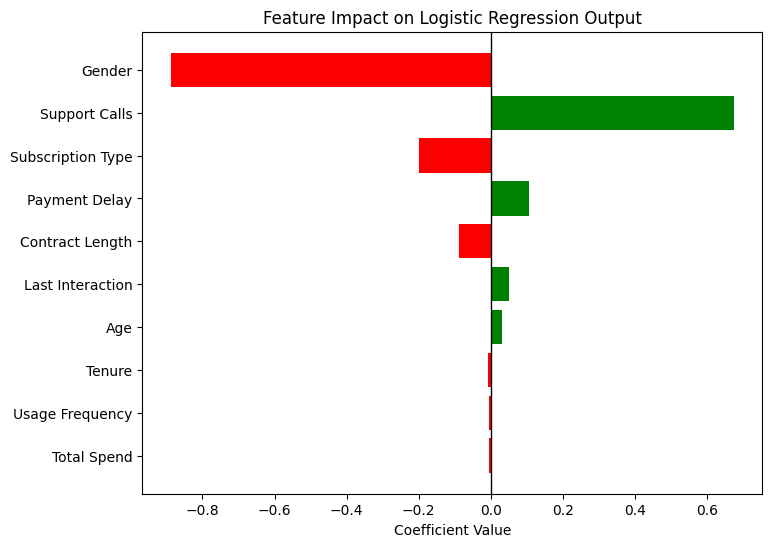

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Feature': ['Support Calls', 'Payment Delay', 'Last Interaction', 'Age', 'Total Spend',
                'Usage Frequency', 'Tenure', 'Contract Length', 'Subscription Type', 'Gender'],
    'Coefficient': [0.675056, 0.105270, 0.049549, 0.032414, -0.005640,
                    -0.006378, -0.007345, -0.089237, -0.198419, -0.888453]
}

df2 = pd.DataFrame(data)


df2 = df2.reindex(df2['Coefficient'].abs().sort_values(ascending=True).index)

plt.figure(figsize=(8, 6))
plt.barh(df2['Feature'], df2['Coefficient'], color=['green' if c > 0 else 'red' for c in df2['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Logistic Regression Output')
plt.axvline(0, color='black', linewidth=1)
plt.show()


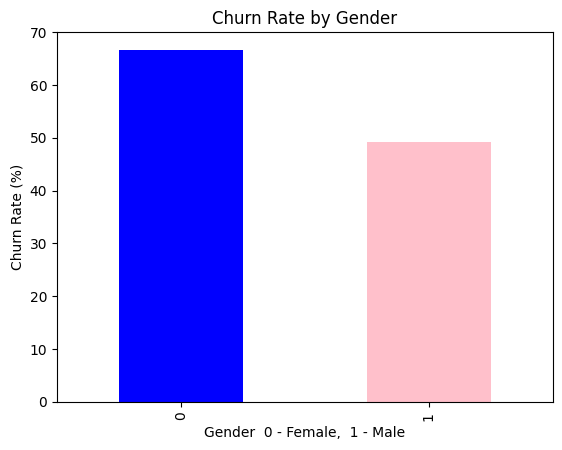

In [ ]:

import matplotlib.pyplot as plt
churn_by_gender = df.groupby('Gender')['Churn'].mean() * 100
churn_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender  0 - Female,  1 - Male')
plt.show()


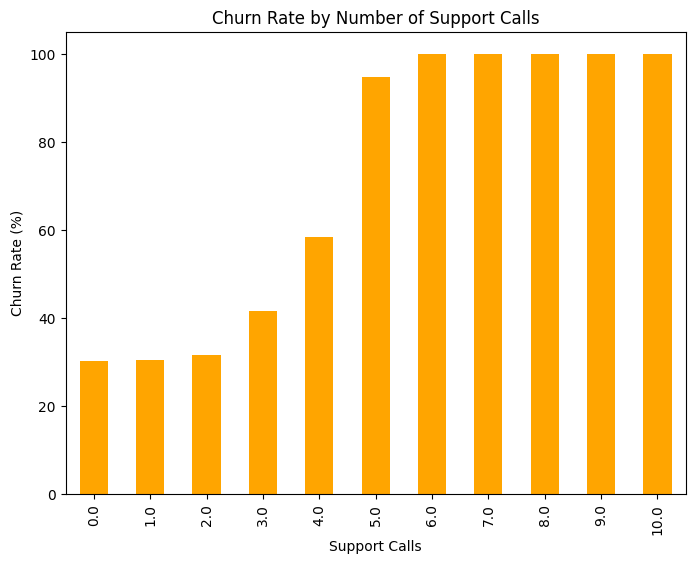

In [ ]:

import pandas as pd


churn_rate_by_calls = df.groupby('Support Calls')['Churn'].mean() * 100

churn_rate_by_calls.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Churn Rate by Number of Support Calls')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Support Calls')
plt.show()
